# VizCode

In [ ]:
#| label: ApprovalRating

# PresJobApprovalD <- PresJobApproval |>
#   slice(rep(1:n(), each = 2))|>
#   filter(!is.na(X.1))
# 
# 
# 
# bandsadmin <- data.frame(
#   start = c(1950, 1953, 1961,1969, 1977, 1981, 1993, 2001, 2009, 2017, 2021),
#   end = c(1953, 1961, 1969,1977, 1981, 1993, 2001, 2009, 2017, 2021, 2025),
#   period = c("Democratic", "Republican", "Democratic","Republican", "Democratic", "Republican","Democratic","Republican", "Democratic", "Republican", "Democratic"),
#   color = c("#1313F7", "#F7000D", "#1313F7","#F7000D","#1313F7","#F7000D", "#1313F7", "#F7000D", "#1313F7", "#F7000D","#1313F7"))
# 
# 
# ggplot(PresJobApproval, aes(x = YEAR, y = Fertility)) +
#   geom_rect(
#     data = bandsadmin,
#     aes(xmin = start, xmax = end, ymin = -Inf, ymax = Inf, fill = period),
#     alpha = 0.5,
#     inherit.aes = FALSE)+
#   geom_line(color = "#460001", size = 1) +
#   geom_hline(yintercept = 2.1, linetype = "dashed", color = "blue") +
#   annotate("text", x = 1955, y = 2.15, label = "Replacement Level (2.1)", color = "black", hjust = -.75, vjust = .25) +
#   scale_fill_manual(values = bands$color) +
#   labs(
#     y = "National Average Birthrate (Births Per Woman)",
#     x = "Year",
#     fill = "Historical Periods",
#     title = "American Birthrates, (1950-2024)",
#     subtitle = "Births per individual woman")+
# theme_minimal()+
# theme(plot.margin = margin(10, 10, 10, 10),
#       aspect.ratio = 0.6,
#       legend.position = "bottom")

In [ ]:
#| label: CensusCleaning

USAPOPCount <- USAPOPCount |>
  filter(AgeGroup != "0-9") |>
  mutate(
    age_group = case_when(
      AgeGroup == "10-19" ~ "10 -19 Years",
      AgeGroup == "20-29" ~ "20 -29 Years",
      AgeGroup == "30-39" ~ "30 -39 Years",
      AgeGroup == "40-49" ~ "40 -49 Years",
      AgeGroup == "50-59" ~ "50 -59 Years",
      AgeGroup == "60-69" ~ "60 - 69 Years",
      AgeGroup %in% c(
        "70-79", "80-89", "90-99",
        "100-109", "110-119", "120-129", "130-139") ~ "70 And Above",
      TRUE ~ NA_character_),
  population = Count) |> 
  select(!AgeGroup) |> 
  select(!Count)

Census2020 <- read_csv("VizCode/Census/Census2020.csv") |> 
  select(3,4,6,contains("TOT")) |> 
  rename(age_under_5   = UNDER5_TOT,
    rrr1      = AGE513_TOT,
    rrr2     = AGE1417_TOT,
    rrr3     = AGE1824_TOT,
    rrr4   = AGE16PLUS_TOT,
    rrr5   = AGE18PLUS_TOT,
    rrr6     = AGE1544_TOT,
    rrr8     = AGE2544_TOT,
    rrr9     = AGE4564_TOT,
    rrr0   = AGE65PLUS_TOT,
    rrr01 = MEDIAN_AGE_TOT) |> 
  select(!contains("rrr")) |>
  mutate(YEAR = case_when(
    YEAR == 1 ~ 2020,
    YEAR == 4 ~ 2022,
    YEAR == 6 ~ 2024,
    TRUE ~ NA_real_
  )) |> 
  filter(!is.na(YEAR))

Rows: 18864 Columns: 96
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): SUMLEV, STATE, COUNTY, STNAME, CTYNAME
dbl (91): YEAR, POPESTIMATE, POPEST_MALE, POPEST_FEM, UNDER5_TOT, UNDER5_MAL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

e.g.:
  dat <- vroom(...)
  problems(dat)

Rows: 44002 Columns: 96
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): STNAME, CTYNAME
dbl (94): SUMLEV, STATE, COUNTY, YEAR, POPESTIMATE, POPEST_MALE, POPEST_FEM,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.

Rows: 102 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Year
dbl (1): Fertility Rate (Births Per Woman)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

ℹ In argument: `YEAR = as.double(YEAR)`.
Caused by warning:
! NAs introduced by coercion

(`geom_area()`).

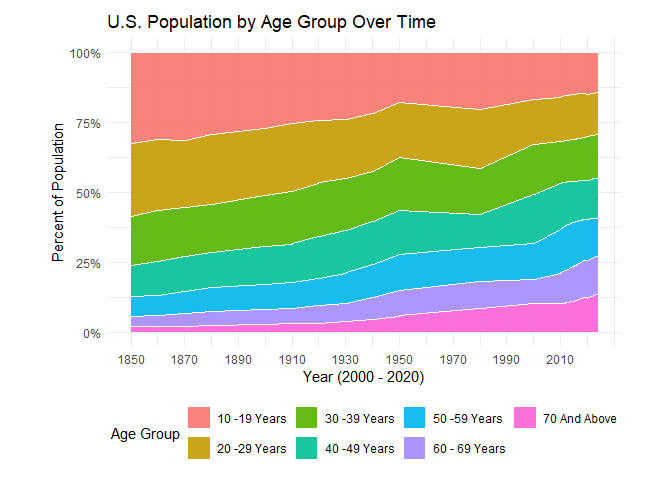

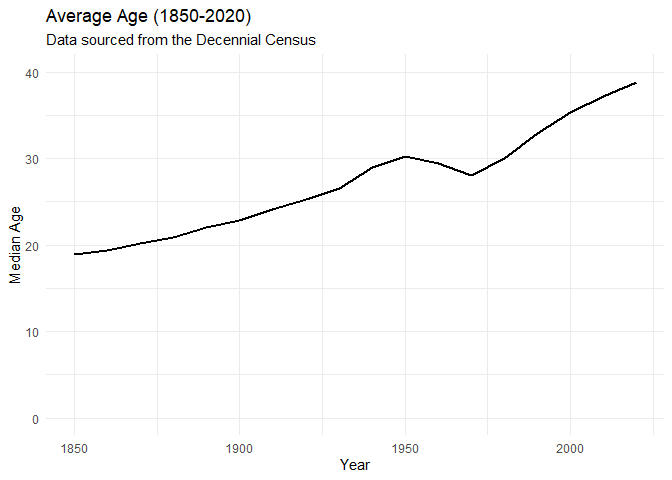

ℹ Please use `linewidth` instead.

(`geom_line()`).

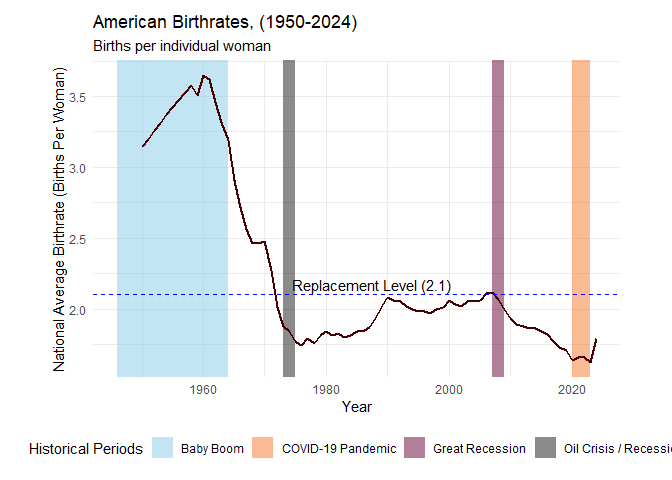